In [5]:
import pandas as pd

In [6]:
teams = pd.read_csv('teams.csv')

In [7]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [8]:
teams = teams[['team', 'country', 'year', 'athletes', 'prev_medals', 'medals']]

In [9]:
teams

,team,country,year,athletes,prev_medals,medals
0,AFG,Afghanistan,1964,8,0.0,0
1,AFG,Afghanistan,1968,5,0.0,0
2,AFG,Afghanistan,1972,8,0.0,0
3,AFG,Afghanistan,1980,11,0.0,0
4,AFG,Afghanistan,2004,5,0.0,0
...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,0.0,0
2140,ZIM,Zimbabwe,2004,14,0.0,3
2141,ZIM,Zimbabwe,2008,16,3.0,4
2142,ZIM,Zimbabwe,2012,9,4.0,0


In [10]:
teams.corr()['medals']

/var/folders/1d/5lgzhmss259bbvzd3xbkk_w40000gn/T/ipykernel_55440/801081661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()['medals']


year          -0.021603
athletes       0.840817
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

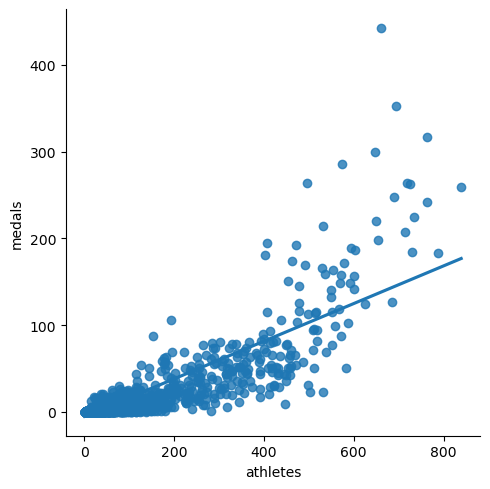

In [11]:
import seaborn as sns 
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

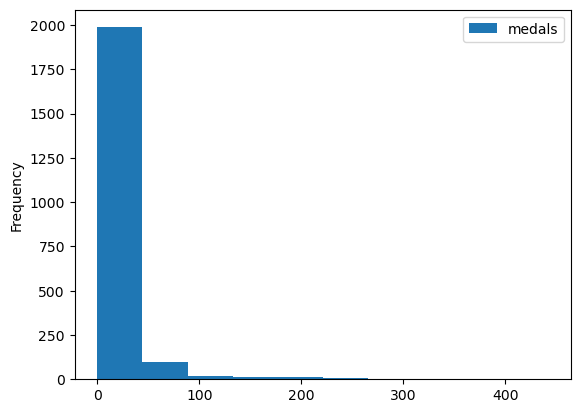

In [12]:
teams.plot.hist(y="medals")

In [13]:
teams.isna().sum()

team             0
country          0
year             0
athletes         0
prev_medals    130
medals           0
dtype: int64

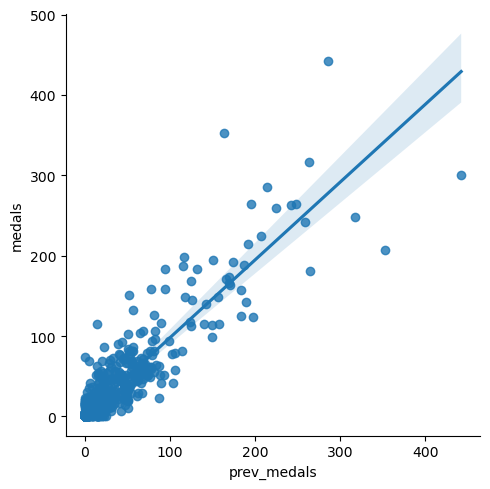

In [14]:
# import matplotlib.pyplot as plt 
# plt.plot(teams.prev_medals, teams.medals)
sns.lmplot(x="prev_medals", y="medals", data=teams, fit_reg=True)

In [15]:
teams = teams.dropna()

In [16]:
teams

,team,country,year,athletes,prev_medals,medals
0,AFG,Afghanistan,1964,8,0.0,0
1,AFG,Afghanistan,1968,5,0.0,0
2,AFG,Afghanistan,1972,8,0.0,0
3,AFG,Afghanistan,1980,11,0.0,0
4,AFG,Afghanistan,2004,5,0.0,0
...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,0.0,0
2140,ZIM,Zimbabwe,2004,14,0.0,3
2141,ZIM,Zimbabwe,2008,16,3.0,4
2142,ZIM,Zimbabwe,2012,9,4.0,0


In [17]:
train_set = teams[teams.year < 2012].copy()
test_set = teams[teams.year >= 2012].copy()

In [18]:
train_set.shape

(1609, 6)

In [19]:
test_set.shape

(405, 6)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
from sklearn.metrics import mean_squared_error 

In [21]:
predictors = ['athletes', 'prev_medals']
target = ['medals']

In [22]:
regressor.fit(train_set[predictors], train_set["medals"])

LinearRegression()

In [23]:
predictions = regressor.predict(test_set[predictors])

In [43]:
test_set["predictions"] = predictions
test_set

,team,country,year,athletes,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,1.0,0,-1.176333
24,ALB,Albania,2012,10,0.0,0,-1.425032
25,ALB,Albania,2016,6,0.0,0,-1.711847
37,ALG,Algeria,2012,39,2.0,1,2.155629
...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,4.0,0,1.505767


In [47]:
test_set.loc[test_set["predictions"] < 0 , "predictions"] = 0 

In [49]:
test_set["predictions"] = test_set.predictions.round()

In [24]:
val_mse = mean_squared_error(predictions, test_set["medals"])

In [25]:
print(val_mse)

66.98656891684992


In [52]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test_set.medals, test_set.predictions)

In [53]:
error

3.2987654320987656

In [54]:
test_set[test_set.team == "USA"]

,team,country,year,athletes,prev_medals,medals,predictions
2053,USA,United States,2012,689,317.0,248,285.0
2054,USA,United States,2016,719,248.0,264,236.0


In [58]:
test_set[test_set.team == "IND"]

,team,country,year,athletes,prev_medals,medals,predictions
907,IND,India,2012,95,3.0,6,7.0
908,IND,India,2016,130,6.0,2,12.0
